In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('cities_r2.csv')

In [10]:
df

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454


In [6]:
df.shape

(493, 22)

In [7]:
df.isna().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

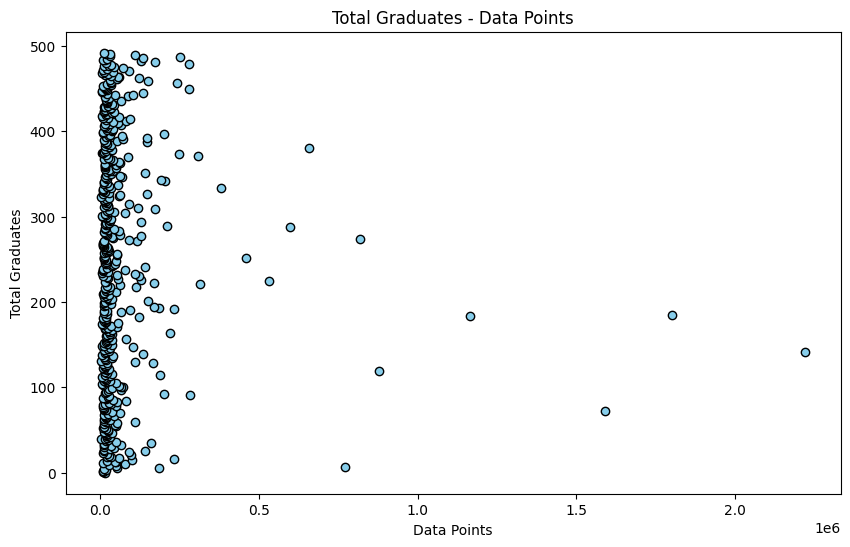

In [15]:
# Visualize the 'total_graduates' column using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['total_graduates'],df.index,  color='skyblue', edgecolor='black')
plt.title('Total Graduates - Data Points')
plt.xlabel('Data Points')
plt.ylabel('Total Graduates')
plt.show()

In [18]:
column_to_cluster = ['total_graduates']
selected_data = df[column_to_cluster]
sc = StandardScaler()
scaled_data = sc.fit_transform(selected_data)

In [23]:
k_rng = range(1,25)

sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(scaled_data)
    sse.append(km.inertia_)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

In [25]:
sse

[492.99999999999983,
 138.70236077934328,
 62.18337428468583,
 29.078746430222175,
 21.170026340681666,
 15.360608682209492,
 10.292239325396263,
 7.52083259204041,
 4.942020573656546,
 4.027300960876826,
 3.1200815872729706,
 2.4595141346871925,
 1.8441534425737072,
 1.4915692374694272,
 1.2471336374883086,
 1.1090139608543224,
 0.9748596486118964,
 0.7490920257282413,
 0.6444133966229132,
 0.5592425148475679,
 0.4824715224038133,
 0.4174481723548157,
 0.35586516224602743,
 0.29688605841883564]

Text(0, 0.5, 'Clustering score')

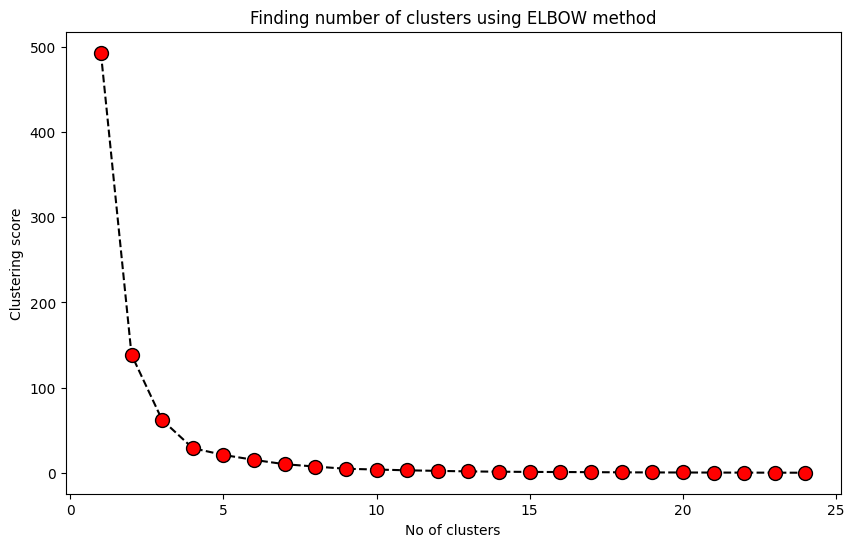

In [27]:
plt.figure(figsize=(10,6))
plt.plot(k_rng, sse, color='black',linestyle='dashed',marker='o',markersize=10,markerfacecolor='red')
plt.title("Finding number of clusters using ELBOW method")
plt.xlabel('No of clusters')
plt.ylabel('Clustering score')

In [29]:
km = KMeans(n_clusters=3,random_state=42)
km.fit(scaled_data)
pred = km.predict(scaled_data)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
df['Cluster'] = pd.DataFrame(pred, columns = ['Cluster'])
print("Number of data points in each cluster is: \n", df['Cluster'].value_counts())

Number of data points in each cluster is: 
 Cluster
0    481
2      9
1      3
Name: count, dtype: int64


In [41]:
km.cluster_centers_

array([[-0.12968682],
       [10.1630973 ],
       [ 3.54334118]])

Text(0.5, 1.0, 'K-Means Clustering')

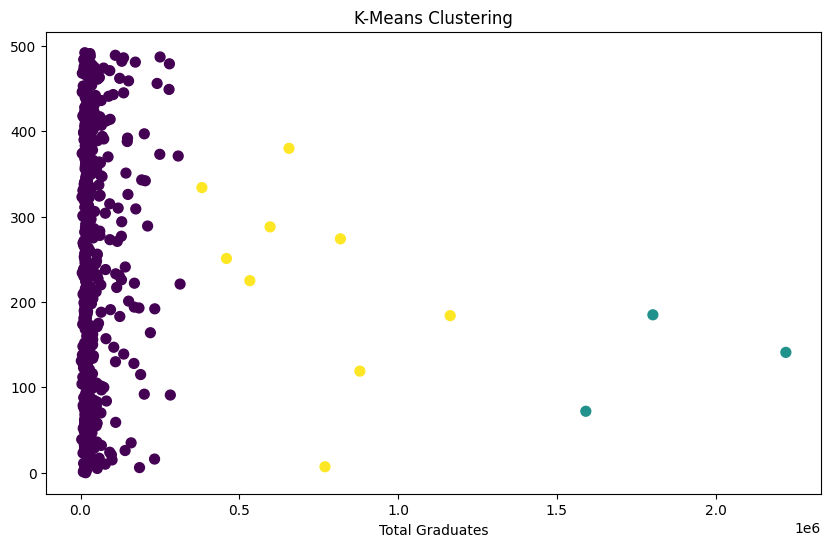

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(df['total_graduates'],df['total_graduates'].index, c=df['Cluster'], marker='o', s=50)
plt.xlabel('Total Graduates')
plt.title('K-Means Clustering')